In [32]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import os
from jupyter_utils import *
from ising_builds import cy_ising_cluster

In [8]:
def read_dir(dir_name: str, lengths: list, load_number=None):
    if dir_name[-1] != '/':
        dir_name += '/'
    dirs = os.listdir(dir_name)

    res = {}
    for d in dirs:
        for L in lengths:
            if d.find(f'L{L}') != -1 or d.find(f'L={L}') != -1:
                print(L, d)
                res[L] = load_Conformations_lite_from_dir(dir_name+d, load_count=load_number)

    return res


In [9]:
L_arr = [250, 500, 1000, 2000]

In [10]:
conformations = read_dir("./Conformations/U=0.1", L_arr)

1000 L1000_beta_0.1_1_10(1000)
2000 L2000_beta_0.1_1_10(1000)
500 L500_beta_0.1_1_10(1000)
250 L250_beta_0.1_1_10(1000)


In [11]:
def mean_mag_from_conf_list(confs):
    mean_m = np.zeros_like(confs[0].mag2)
    for c in confs:
        mean_m += c.mag2
    
    mean_m /= len(confs)

    mag_err = np.zeros_like(mean_m)
    for c in confs:
        mag_err += (mean_m - c.mag2) ** 2
    
    mag_err = np.sqrt(mag_err / len(confs))

    return mean_m, mag_err

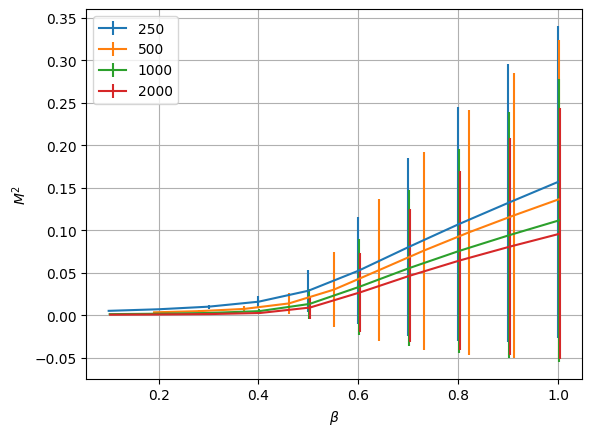

In [19]:
for i, L in enumerate(L_arr):
    confs = conformations[L]
    m, m_er = mean_mag_from_conf_list(confs)
    plt.errorbar(confs[0].betas+0.001*i, m, yerr=m_er, label=str(L))
plt.xlabel(BETA)
plt.ylabel("$M^2$")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [24]:
np.sqrt(250)

15.811388300841896

/home/roman/Programs/projects/Ising-on-random-conformation/utils.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(struct[:, 0], struct[:, 1], '-g', color='gray')


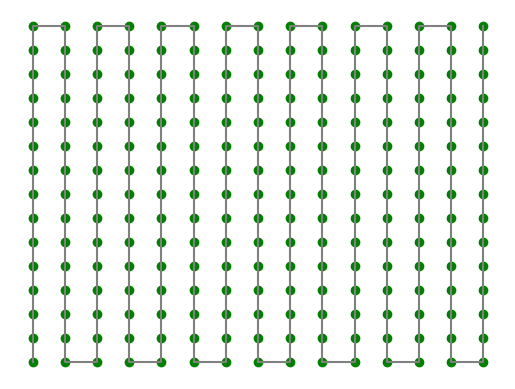

In [25]:
square = square_2D(15)
draw_conformation(square)

In [37]:
bettas = np.linspace(0.1, 1.0, 10)
neig = tabulate_neighbors(square)
mags = []
for b in bettas:
    res = cy_ising_cluster.simulate(
        neighbors=neig,
        beta=b,
        num_sweeps=100000
    )
    mags.append(res[2])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [31]:
neig.shape

(225, 5)